# **Airline Customer Analytics**

This report documents the evaluation of the airline passenger satisfaction survey covering the following questions:


**Customer Satisfaction**

* What factors can be used to predict a satisfied (or dissatisfied) passenger?
*   How could this information be used to improve the overall satisfaction?

**Analysis of groups of similar customers**

*   How can these groups be characterized?
*   How could this information be used in the airline’s operations?



# **Data Preparation**

## Import Packages

Reminder of what the packages are for:
- **`pandas`** is a data manipulation package. It lets us store data in data frames. More on this below.
- **`sklearn`** is a machine learning and data science package. It lets us do fairly complicated machine learning tasks, such as running regressions and building classification models with only a few lines of code. (Nice!)
- **`matplotlib`** lets you make plots and graphs directly from your code.  This can be a secret weapon when combined with notebooks, as you can very easily rerun analyses on different data or with slightly different code, and the graphs can just appear magically.  (Ok, always easier said than done, but you get the idea.)
- **`numpy`** (pronounced num-pie) is used for doing "math stuff", such as complex mathematical operations (e.g., square roots, exponents, logs), operations on matrices, and more. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
# Make sure that plot is shown in the notebook
%matplotlib inline
import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split





## Enable Table View

In [ ]:
#from google.colab import data_table
#data_table.enable_dataframe_formatter()

## Import of Raw Data File (passenger_data.csv)


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:




path = "/content/drive/MyDrive/Big data and AI/passenger_data.csv"

df = pd.read_csv(path,)

## Data Cleaning


First look at what the data looks like:


*   Checking the Head
*   Checking the Tail



In [ ]:
df.head (5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.tail (5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103919,103919,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
103920,103920,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
103921,103921,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
103922,103922,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied
103923,103923,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,2,5,4,2,2,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


Get a first summary of the raw data:

Here are definitions of some variables that are shown in Dtype column

**int:** a = 5

**float:** b = 5.2

**str:** c = 'hello'

**list:** A = [1,4,7]

**dict:** B = {'k1':'Sun','K2':"Mon",'K3':'Tue'}


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103924 entries, 0 to 103923
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103924 non-null  int64  
 1   id                                 103924 non-null  int64  
 2   Gender                             103924 non-null  object 
 3   Customer Type                      103924 non-null  object 
 4   Age                                103924 non-null  int64  
 5   Type of Travel                     103924 non-null  object 
 6   Class                              103924 non-null  object 
 7   Flight Distance                    103924 non-null  int64  
 8   Inflight wifi service              103924 non-null  int64  
 9   Departure/Arrival time convenient  103924 non-null  int64  
 10  Ease of Online booking             103924 non-null  int64  
 11  Gate location                      1039

Above you can see, that column 23 Arrival Delay in Minutes contains 103614 values while all others have 103924. We will now investigate if these 310 missing lines are blank.

In [ ]:
df.isnull().sum() 

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Ineed 310 lines contain no value, we will now display these lines to have a look what they look like. 

In [ ]:
#Display NaN lines of column Arrival Delay in Minutes
df[df.isnull().any(axis=1)].head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,5,5,5,5,5,2,4,1,1,5,31,NaN,satisfied
1124,1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,4,3,4,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,2,4,3,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,2,3,2,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,5,2,5,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
2485,2485,121173,Female,Loyal Customer,28,Personal Travel,Eco,2370,4,5,4,3,3,4,3,3,5,4,4,5,4,3,3,NaN,satisfied
2630,2630,3638,Male,Loyal Customer,35,Business travel,Business,1534,1,1,1,1,3,5,4,5,5,5,5,5,5,5,0,NaN,satisfied
3621,3621,48387,Male,Loyal Customer,47,Personal Travel,Eco,587,1,2,1,3,4,1,4,4,1,1,4,4,4,4,17,NaN,neutral or dissatisfied
4041,4041,66091,Male,Loyal Customer,31,Business travel,Business,2490,1,1,1,1,4,4,4,4,3,5,5,4,4,4,6,NaN,satisfied
4490,4490,48504,Male,disloyal Customer,30,Business travel,Eco,737,4,4,4,3,2,4,2,2,5,1,4,1,3,2,22,NaN,neutral or dissatisfied


To further analyse we will use the headers of specific columns in our code. But in code language spaces are an issue, therefore we will rename all columns so that the spaces are replaced by underscore and since we clean them anyway, we might as well make them look nice and tidy and fix the lower and upper case mix to appear uniform. 

In [ ]:
# Rename Columns
df.rename( columns={'Unnamed: 0':'Index','id':'ID','Customer Type':'Customer_Type', 'Type of Travel':'Type_Of_Travel', 'Flight Distance':'Flight_Distance', 'Inflight wifi service':'Inflight_Wifi_Service', 'Departure/Arrival time convenient':'Departure_Arrival_Time_Convenient', 'Ease of Online booking':'Ease_Of_Online_Booking', 'Gate location':'Gate_Location', 'Food and drink':'Food_And_Drink','Online boarding':'Online_Boarding','Seat comfort':'Seat_Comfort','Inflight entertainment':'Inflight_Entertainment','On-board service':'On_Board_Service','Leg room service':'Leg_Room_Service','Baggage handling':'Baggage_Handling','Checkin service':'Checkin_Service','Inflight service':'Inflight_Service','Departure Delay in Minutes':'Departure_Delay_Min','Arrival Delay in Minutes':'Arrival_Delay_Min','satisfaction':'Satisfaction'}, inplace=True )





Check unique values of each column (excluding columns where infinite values are possible, e.g. minutes delay)

In [ ]:


# Check unique values of each column
print('ID' + str(df['ID'].unique()))
print('Gender' + str(df['Gender'].unique()))
print('Customer_Type' + str(df['Customer_Type'].unique()))
print('Age' + str(df['Age'].unique()))
print('Type_Of_Travel' + str(df['Type_Of_Travel'].unique()))
print('Class' + str(df['Class'].unique()))
print('Inflight_Wifi_service:' + str(df['Inflight_Wifi_Service'].unique()))
print('Departure_Arrival_Time_Convenient:' + str(df['Departure_Arrival_Time_Convenient'].unique()))
print('Ease_Of_Online_Booking:' + str(df['Ease_Of_Online_Booking'].unique()))
print('Gate_Location:' + str(df['Gate_Location'].unique()))
print('Food_And_drink' + str(df['Food_And_Drink'].unique()))
print('Online_Boarding:' + str(df['Online_Boarding'].unique()))
print('Seat_Comfort' + str(df['Seat_Comfort'].unique()))
print('Inflight_Entertainment' + str(df['Inflight_Entertainment'].unique()))
print('On_board_Service' + str(df['On_Board_Service'].unique()))
print('Leg_Room_Service' + str(df['Leg_Room_Service'].unique()))
print('Baggage_Handling' + str(df['Baggage_Handling'].unique()))
print('Checkin_Service' + str(df['Checkin_Service'].unique()))
print('Inflight_Service' + str(df['Inflight_Service'].unique()))
print('Cleanliness' + str(df['Cleanliness'].unique()))
print('Satisfaction' + str(df['Satisfaction'].unique()))







ID[ 70172   5047 110028 ...  37675  90086  34799]
Gender['Male' 'Female' 'na' 'Diverse']
Customer_Type['Loyal Customer' 'disloyal Customer' 'Disloyal Customer']
Age[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
Type_Of_Travel['Personal Travel' 'Business travel' 'Business Travel']
Class['Eco Plus' 'Business' 'Eco']
Inflight_Wifi_service:[3 2 4 1 5 0]
Departure_Arrival_Time_Convenient:[4 2 5 3 1 0]
Ease_Of_Online_Booking:[3 2 5 4 1 0]
Gate_Location:[1 3 2 5 4 0]
Food_And_drink[5 1 2 4 3 0]
Online_Boarding:[3 5 2 1 4 0]
Seat_Comfort[5 1 2 3 4 0]
Inflight_Entertainment[5 1 2 3 4 0]
On_board_Service[4 1 2 3 5 0]
Leg_Room_Service[3 5 4 2 1 0]
Baggage_Handling[4 3 5 1 2]
Checkin_Service[4 1 3 5 2 0]
Inflight_Service[5 4 3 1 2 0]
Cleanliness[5 1 2 3 4 0]
Satisfaction['neutral or dissatisfied' 'satisfied' 'no answe

We can see the unique values for each column except for id where the "..." indicate that to many values to display are in the column. 

In [ ]:
#Check if id is a customer id or answer ID from the survey
df['ID'].nunique()

103924

Result shows that each row contains a unique value. So it is something like a survey id that was created when the customer filled out the survey. But we would not be able to see if a specific customer answered the survey multiple times. 

In the following we will clean up the data and therefore we create a copy of our original dataframe in case we need to go back to the raw data. 

What we need to clean up:   


*  Index is not needed for further analysis, we will drop this column
*  Disloyal Customer is sometimes spelled with lower and sometimes upper case
*  The same problem appears for Business Travel


In [ ]:
# Create Copy of df
df_clean = df.copy()

# Drop Index Column since it has no value adding information
# df_clean.drop(['Index'], axis=1, inplace=True)


# Unique value harmonization - Replace values with upper/lower case differences

df_clean= df_clean.replace(['disloyal Customer'], 'Disloyal Customer')

df_clean= df_clean.replace(['Business travel'],'Business Travel')







For the column Satisfaction contains three unique entries: ['neutral or dissatisfied' 'satisfied' 'no answer']

For the column Gender contains 4 unique entries: ['Male' 'Female' 'na' 'Diverse']



For our further analysis Satisfaction: "no answer" and Gender "na" is not value adding. We want to see how many lines have this value. 


In [ ]:
print("Gender count") 
print(str(df.Gender.value_counts()))

print("Satisfaction count") 
print(str(df.Satisfaction.value_counts()))


Gender count
Female     52728
Male       51180
na             9
Diverse        7
Name: Gender, dtype: int64
Satisfaction count
neutral or dissatisfied    58890
satisfied                  45028
no answer                      6
Name: Satisfaction, dtype: int64


The result shows we only have 9/7 for na/Diverse and 6 for no answer out of 103924 lines. Since this is not significant for the total data set we will drop these lines completely. The loss in information from the other columns is not significant.  

Suggestion: If further analysis on diverse gender is required, more data is needed.

In [ ]:
# drop diverse
df_clean.drop(df_clean.index[df_clean['Gender'] == 'Diverse'], inplace=True)

# drop no answer
df_clean.drop(df_clean.index[df_clean['Satisfaction'] == 'no answer'], inplace=True)

# drop na
df_clean.drop(df_clean.index[df_clean['Gender'] == 'na'], inplace=True)

We will now check the unique values of each column of our df_clean

In [ ]:
print('Gender' + str(df_clean['Gender'].unique()))
print('Customer_Type' + str(df_clean['Customer_Type'].unique()))
print('Age' + str(df_clean['Age'].unique()))
print('Type_Of_Travel' + str(df_clean['Type_Of_Travel'].unique()))
print('Class' + str(df_clean['Class'].unique()))
print('Inflight_Wifi_service:' + str(df_clean['Inflight_Wifi_Service'].unique()))
print('Departure_Arrival_Time_Convenient:' + str(df_clean['Departure_Arrival_Time_Convenient'].unique()))
print('Ease_Of_Online_Booking:' + str(df_clean['Ease_Of_Online_Booking'].unique()))
print('Gate_Location:' + str(df_clean['Gate_Location'].unique()))
print('Food_And_drink' + str(df_clean['Food_And_Drink'].unique()))
print('Online_Boarding:' + str(df_clean['Online_Boarding'].unique()))
print('Seat_Comfort' + str(df_clean['Seat_Comfort'].unique()))
print('Inflight_Entertainment' + str(df_clean['Inflight_Entertainment'].unique()))
print('On_board_Service' + str(df_clean['On_Board_Service'].unique()))
print('Leg_Room_Service' + str(df_clean['Leg_Room_Service'].unique()))
print('Baggage_Handling' + str(df_clean['Baggage_Handling'].unique()))
print('Checkin_Service' + str(df_clean['Checkin_Service'].unique()))
print('Inflight_Service' + str(df_clean['Inflight_Service'].unique()))
print('Cleanliness' + str(df_clean['Cleanliness'].unique()))
print('Satisfaction' + str(df_clean['Satisfaction'].unique()))




Gender['Male' 'Female']
Customer_Type['Loyal Customer' 'Disloyal Customer']
Age[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
Type_Of_Travel['Personal Travel' 'Business Travel']
Class['Eco Plus' 'Business' 'Eco']
Inflight_Wifi_service:[3 2 4 1 5 0]
Departure_Arrival_Time_Convenient:[4 2 5 3 1 0]
Ease_Of_Online_Booking:[3 2 5 4 1 0]
Gate_Location:[1 3 2 5 4 0]
Food_And_drink[5 1 2 4 3 0]
Online_Boarding:[3 5 2 1 4 0]
Seat_Comfort[5 1 2 3 4 0]
Inflight_Entertainment[5 1 2 3 4 0]
On_board_Service[4 1 2 3 5 0]
Leg_Room_Service[3 5 4 2 1 0]
Baggage_Handling[4 3 5 1 2]
Checkin_Service[4 1 3 5 2 0]
Inflight_Service[5 4 3 1 2 0]
Cleanliness[5 1 2 3 4 0]
Satisfaction['neutral or dissatisfied' 'satisfied']


#### Dummyize
A dummy variable is a binary variable corresponding to one value of a categorical variable. In our dataset the features Gender, Customer_Type, Type_Of_Travel, Class, Satisfaction are categorical. We will now dummyize them.



In [ ]:
for field in ['Gender','Customer_Type','Type_Of_Travel','Class','Satisfaction']:
    # Get one hot encoding
    one_hot = pd.get_dummies(df_clean[field], prefix=field)
    
    # Drop column as it is now encoded
    df_clean = df_clean.drop(field,axis = 1)
    # Join the encoded df
    df_clean = df_clean.join(one_hot)
    
df_clean.head()

,Index,ID,Age,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_Of_Online_Booking,Gate_Location,Food_And_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_Min,Arrival_Delay_Min,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Of_Travel_Business Travel,Type_Of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Satisfaction_neutral or dissatisfied,Satisfaction_satisfied
0,0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,1,0,1,0,1,0,0,1,1,0
1,1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,1,1,0,1,0,1,0,0,1,0
2,2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,0,0,1,1,0,1,0,0,0,1
3,3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,1,0,0,1,1,0,1,0,0,1,0
4,4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,0,1,0,1,1,0,1,0,0,0,1


In [ ]:
df_clean = df_clean.rename(columns={'Satisfaction_neutral or dissatisfied':'Satisfaction_neutral_or_dissatisfied'})
df_clean.head()

,Index,ID,Age,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_Of_Online_Booking,Gate_Location,Food_And_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_Min,Arrival_Delay_Min,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Of_Travel_Business Travel,Type_Of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Satisfaction_neutral_or_dissatisfied,Satisfaction_satisfied
0,0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,1,0,1,0,1,0,0,1,1,0
1,1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,1,1,0,1,0,1,0,0,1,0
2,2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,0,0,1,1,0,1,0,0,0,1
3,3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,1,0,0,1,1,0,1,0,0,1,0
4,4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,0,1,0,1,1,0,1,0,0,0,1


## Predict missing values

Earlier we found that the column Arrival Delay in Minutes is missing 310 values. We will predict the Arrival Delay in Minutes with a linear regression and fill these columns accordingly. This is only a minor portion of the data but for further projects we would like to point out that we can deal with missing values. 

Import packages

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
# Make sure that plot is shown in the notebook
%matplotlib inline

Train the model

In [ ]:
df_model=df_clean.dropna() #310 missing lines dropped to built model

X = df_model[['Departure_Delay_Min']] 
Y = df_model['Arrival_Delay_Min']     

model = LinearRegression()
model.fit(X, Y)

LinearRegression()

Plot the Model

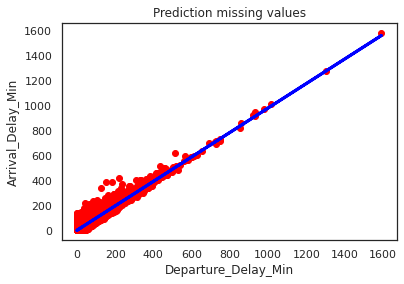

In [ ]:
# Apply the model
Y_pred = model.predict(X)

# Graphical output
plt.scatter(X, Y,  color='red')
plt.plot(X, Y_pred, color='blue', linewidth=3)
plt.title('Prediction missing values')
plt.xlabel('Departure_Delay_Min')
plt.ylabel('Arrival_Delay_Min')

plt.show()

Make Predictions

In [ ]:
Departure_Delay = 45

num_pred = model.predict(np.array([Departure_Delay]).reshape(1, -1))

print("If the flight departed", Departure_Delay, "minutes late, we expect ", round(num_pred[0],5), "minutes in column Arrival_Delay_Min.")

If the flight departed 45 minutes late, we expect  44.8326 minutes in column Arrival_Delay_Min.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Now lets display again the head of our dataframe to see what it looks like after data cleaning is finished. 

In [ ]:
df_clean.head()


,Index,ID,Age,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_Of_Online_Booking,Gate_Location,Food_And_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_Min,Arrival_Delay_Min,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Of_Travel_Business Travel,Type_Of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Satisfaction_neutral_or_dissatisfied,Satisfaction_satisfied
0,0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,1,0,1,0,1,0,0,1,1,0
1,1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,1,1,0,1,0,1,0,0,1,0
2,2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,0,0,1,1,0,1,0,0,0,1
3,3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,1,0,0,1,1,0,1,0,0,1,0
4,4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,0,1,0,1,1,0,1,0,0,0,1


Now we will extract some core information of our data to get an overview:

In [ ]:
df_clean.describe()

,Index,ID,Age,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_Of_Online_Booking,Gate_Location,Food_And_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_Min,Arrival_Delay_Min,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Of_Travel_Business Travel,Type_Of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Satisfaction_neutral_or_dissatisfied,Satisfaction_satisfied
count,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103592.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000
mean,51959.669602,64925.681796,39.379704,1189.422927,2.729668,3.060336,2.756915,2.976853,3.202171,3.250380,3.439385,3.358107,3.382408,3.350936,3.631903,3.304258,3.640517,3.286251,14.813006,15.176288,0.507440,0.492560,0.182701,0.817299,0.689650,0.310350,0.477998,0.449895,0.072106,0.566678,0.433322
std,30000.267678,37463.460601,15.114700,997.127264,1.327822,1.525114,1.398987,1.277644,1.329445,1.349507,1.318981,1.332960,1.288399,1.315646,1.180921,1.265379,1.175654,1.312209,38.228084,38.696031,0.499947,0.499947,0.386423,0.386423,0.462639,0.462639,0.499518,0.497486,0.258665,0.495536,0.495536
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25980.250000,32535.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51957.500000,64859.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,77940.750000,97368.750000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,103923.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As you can see above everything is now harmonized, so only issue to be noted:





> Column Baggage_Handling is the only column where the unique values contain only 1,2,3,4,5 but no 0. There might have been an issue in the survey design, that the option to choose 0 was not available. We assume that it is rather unlikely that all customers replied above 0. However, we have no further option to investigate why this issue occured. In the following analysis the column will remain as it was delivered in the raw data set.






## Replacing "Not applicable" responses with the mean value of that columns

Most columns contain data, that are referring to an response from the survey participant meaning "not applicable". That are all the values "0" in the following columns:
* Inflight_Wifi_service
* Departure_Arrival_Time_Convenient
* Ease_Of_Online_Booking
* Gate_Location
* Food_And_drink
* Online_Boarding
* Seat_Comfort
* Inflight_Entertainment
* On_board_Service
* Leg_Room_Service
* Checkin_Service
* Inflight_Service
* Cleanliness

For these columns the mean value of the rest of the participants response will be set in place of the 0 values, so that we will be able to use these lines for different models. Keeping the 0 values, would put those responses in a classification that is below a rate of 1. However, that is not what it was meant to mean.

In [ ]:
#Clean up for Wifi Column
cleaning_helper = df_clean.copy()
cleaning_helper.drop(df_clean.index[df_clean["Inflight_Wifi_Service"] == 0], inplace=True)

cleaning_helper_mean = cleaning_helper["Inflight_Wifi_Service"].mean()
df_clean["Inflight_Wifi_Service"] = df_clean["Inflight_Wifi_Service"].replace(0,cleaning_helper_mean)

#Clean up for Departure_Arrival_Time_Convenient
cleaning_helper = df_clean.copy()
cleaning_helper.drop(df_clean.index[df_clean["Departure_Arrival_Time_Convenient"] == 0], inplace=True)

cleaning_helper_mean = cleaning_helper["Departure_Arrival_Time_Convenient"].mean()
df_clean["Departure_Arrival_Time_Convenient"] = df_clean["Departure_Arrival_Time_Convenient"].replace(0,cleaning_helper_mean)

#Clean up for Ease_Of_Online_Booking
cleaning_helper = df_clean.copy()
cleaning_helper.drop(df_clean.index[df_clean["Ease_Of_Online_Booking"] == 0], inplace=True)

cleaning_helper_mean = cleaning_helper["Ease_Of_Online_Booking"].mean()
df_clean["Ease_Of_Online_Booking"] = df_clean["Ease_Of_Online_Booking"].replace(0,cleaning_helper_mean)

#Clean up for Gate_Location
cleaning_helper = df_clean.copy()
cleaning_helper.drop(df_clean.index[df_clean["Gate_Location"] == 0], inplace=True)

cleaning_helper_mean = cleaning_helper["Gate_Location"].mean()
df_clean["Gate_Location"] = df_clean["Gate_Location"].replace(0,cleaning_helper_mean)

#Clean up for Food_And_Drink
cleaning_helper = df_clean.copy()
cleaning_helper.drop(df_clean.index[df_clean["Food_And_Drink"] == 0], inplace=True)

cleaning_helper_mean = cleaning_helper["Food_And_Drink"].mean()
df_clean["Food_And_Drink"] = df_clean["Food_And_Drink"].replace(0,cleaning_helper_mean)

#Clean up for Online_Boarding
cleaning_helper = df_clean.copy()
cleaning_helper.drop(df_clean.index[df_clean["Online_Boarding"] == 0], inplace=True)

cleaning_helper_mean = cleaning_helper["Online_Boarding"].mean()
df_clean["Online_Boarding"] = df_clean["Online_Boarding"].replace(0,cleaning_helper_mean)

#Clean up for Seat_Comfort
cleaning_helper = df_clean.copy()
cleaning_helper.drop(df_clean.index[df_clean["Seat_Comfort"] == 0], inplace=True)

cleaning_helper_mean = cleaning_helper["Seat_Comfort"].mean()
df_clean["Seat_Comfort"] = df_clean["Seat_Comfort"].replace(0,cleaning_helper_mean)

#Clean up for Inflight_Entertainment
cleaning_helper = df_clean.copy()
cleaning_helper.drop(df_clean.index[df_clean["Inflight_Entertainment"] == 0], inplace=True)

cleaning_helper_mean = cleaning_helper["Inflight_Entertainment"].mean()
df_clean["Inflight_Entertainment"] = df_clean["Inflight_Entertainment"].replace(0,cleaning_helper_mean)

#Clean up for On_Board_Service
cleaning_helper = df_clean.copy()
cleaning_helper.drop(df_clean.index[df_clean["On_Board_Service"] == 0], inplace=True)

cleaning_helper_mean = cleaning_helper["On_Board_Service"].mean()
df_clean["On_Board_Service"] = df_clean["On_Board_Service"].replace(0,cleaning_helper_mean)

#Clean up for Leg_Room_Service
cleaning_helper = df_clean.copy()
cleaning_helper.drop(df_clean.index[df_clean["Leg_Room_Service"] == 0], inplace=True)

cleaning_helper_mean = cleaning_helper["Leg_Room_Service"].mean()
df_clean["Leg_Room_Service"] = df_clean["Leg_Room_Service"].replace(0,cleaning_helper_mean)

#Clean up for Checkin_Service
cleaning_helper = df_clean.copy()
cleaning_helper.drop(df_clean.index[df_clean["Checkin_Service"] == 0], inplace=True)

cleaning_helper_mean = cleaning_helper["Checkin_Service"].mean()
df_clean["Checkin_Service"] = df_clean["Checkin_Service"].replace(0,cleaning_helper_mean)

#Clean up for Inflight_Service
cleaning_helper = df_clean.copy()
cleaning_helper.drop(df_clean.index[df_clean["Inflight_Service"] == 0], inplace=True)

cleaning_helper_mean = cleaning_helper["Inflight_Service"].mean()
df_clean["Inflight_Service"] = df_clean["Inflight_Service"].replace(0,cleaning_helper_mean)

#Clean up for Cleanliness
cleaning_helper = df_clean.copy()
cleaning_helper.drop(df_clean.index[df_clean["Cleanliness"] == 0], inplace=True)

cleaning_helper_mean = cleaning_helper["Cleanliness"].mean()
df_clean["Cleanliness"] = df_clean["Cleanliness"].replace(0,cleaning_helper_mean)


Now let's check again the unique values of our columns of df_clean

In [ ]:
print('Inflight_Wifi_service:' + str(df_clean['Inflight_Wifi_Service'].unique()))
print('Departure_Arrival_Time_Convenient:' + str(df_clean['Departure_Arrival_Time_Convenient'].unique()))
print('Ease_Of_Online_Booking:' + str(df_clean['Ease_Of_Online_Booking'].unique()))
print('Gate_Location:' + str(df_clean['Gate_Location'].unique()))
print('Food_And_drink' + str(df_clean['Food_And_Drink'].unique()))
print('Online_Boarding:' + str(df_clean['Online_Boarding'].unique()))
print('Seat_Comfort' + str(df_clean['Seat_Comfort'].unique()))
print('Inflight_Entertainment' + str(df_clean['Inflight_Entertainment'].unique()))
print('On_board_Service' + str(df_clean['On_Board_Service'].unique()))
print('Leg_Room_Service' + str(df_clean['Leg_Room_Service'].unique()))
print('Baggage_Handling' + str(df_clean['Baggage_Handling'].unique()))
print('Checkin_Service' + str(df_clean['Checkin_Service'].unique()))
print('Inflight_Service' + str(df_clean['Inflight_Service'].unique()))
print('Cleanliness' + str(df_clean['Cleanliness'].unique()))

Inflight_Wifi_service:[3.         2.         4.         1.         5.         2.81369855]
Departure_Arrival_Time_Convenient:[4.         2.         5.         3.         1.         3.22483317]
Ease_Of_Online_Booking:[3.         2.         5.         4.         1.         2.88137486]
Gate_Location:[1.         3.         2.         5.         4.         2.97688184]
Food_And_drink[5.         1.         2.         4.         3.         3.20547233]
Online_Boarding:[3.         5.         2.         1.         4.         3.32815302]
Seat_Comfort[5.         1.         2.         3.         4.         3.43941829]
Inflight_Entertainment[5.         1.         2.         3.         4.         3.35855922]
On_board_Service[4.         1.         2.         3.         5.         3.38250609]
Leg_Room_Service[3.         5.         4.         2.         1.         3.36626091]
Baggage_Handling[4 3 5 1 2]
Checkin_Service[4.         1.         3.         5.         2.         3.30428966]
Inflight_Service[5. 

In [ ]:
df_clean.head()

,Index,ID,Age,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_Of_Online_Booking,Gate_Location,Food_And_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_Min,Arrival_Delay_Min,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Of_Travel_Business Travel,Type_Of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Satisfaction_neutral_or_dissatisfied,Satisfaction_satisfied
0,0,70172,13,460,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4,4.0,5.0,5.0,25,18.0,0,1,0,1,0,1,0,0,1,1,0
1,1,5047,25,235,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3,1.0,4.0,1.0,1,6.0,0,1,1,0,1,0,1,0,0,1,0
2,2,110028,26,1142,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4,4.0,4.0,5.0,0,0.0,1,0,0,1,1,0,1,0,0,0,1
3,3,24026,25,562,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3,1.0,4.0,2.0,11,9.0,1,0,0,1,1,0,1,0,0,1,0
4,4,119299,61,214,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4,3.0,3.0,3.0,0,0.0,0,1,0,1,1,0,1,0,0,0,1


In [ ]:
df_clean.describe()

,Index,ID,Age,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_Of_Online_Booking,Gate_Location,Food_And_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_Min,Arrival_Delay_Min,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Of_Travel_Business Travel,Type_Of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Satisfaction_neutral_or_dissatisfied,Satisfaction_satisfied
count,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103592.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000
mean,51959.669602,64925.681796,39.379704,1189.422927,2.813699,3.224833,2.881375,2.976882,3.205472,3.328153,3.439418,3.358559,3.382506,3.366261,3.631903,3.304290,3.640622,3.286630,14.813006,15.176288,0.507440,0.492560,0.182701,0.817299,0.689650,0.310350,0.477998,0.449895,0.072106,0.566678,0.433322
std,30000.267678,37463.460601,15.114700,997.127264,1.238440,1.350018,1.270448,1.277611,1.325464,1.252348,1.318938,1.332390,1.288271,1.295983,1.180921,1.265337,1.175491,1.311734,38.228084,38.696031,0.499947,0.499947,0.386423,0.386423,0.462639,0.462639,0.499518,0.497486,0.258665,0.495536,0.495536
min,0.000000,1.000000,7.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25980.250000,32535.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51957.500000,64859.500000,40.000000,843.000000,3.000000,3.224833,3.000000,3.000000,3.000000,3.328153,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,77940.750000,97368.750000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,103923.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Correlation Check**

In order to apply a data model we need to check which features correlate with our dependent variable. The dependent variable is Satisfaction as we are aiming to find out what other features influence Satisfaction. Among the independent variables we have to eliminate correlating independent features as they are 
redundant information. Correlating independent variances influence the accuarcy of the results of our model negatively. An easy/intuitive way to check this is using a heat map. 

For further reference on what a heat map is and why it is important to eliminate correlating feature from a model the article below gives further insight. We will use the graphical layout as well as it is a comprehensive layout:

https://medium.com/@connor.anderson_42477/hot-or-not-heatmaps-and-correlation-matrix-plots-940088fa2806

In [ ]:
import matplotlib.pyplot as plt
# Plots direkt anzeigen
%matplotlib inline
import seaborn as sns

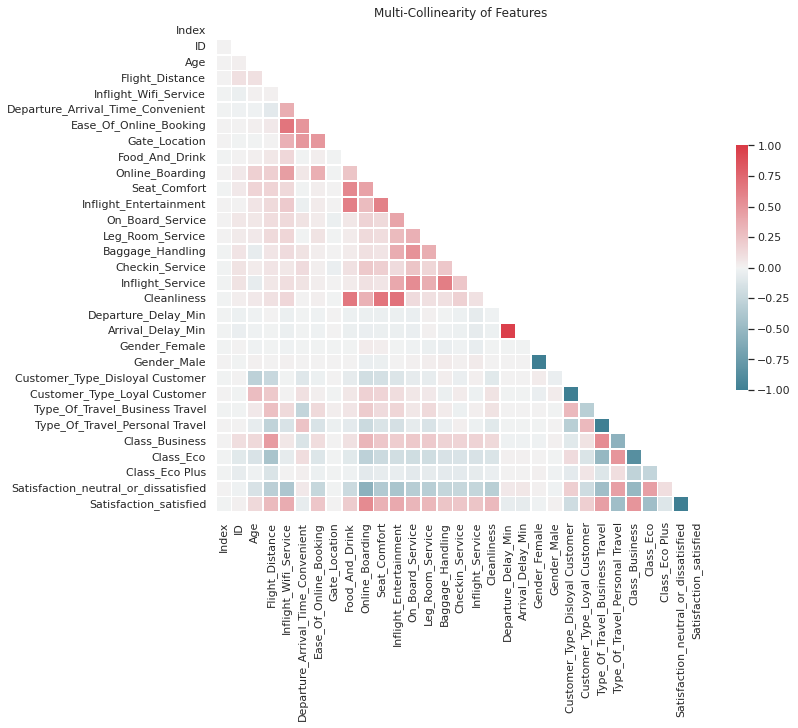

In [ ]:
sns.set(style="white")

# Create a covariance matrix
corr = df_clean.corr()

# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.8, cbar_kws={'shrink': .5})

ax.set_title('Multi-Collinearity of Features')
plt.savefig('correlation2.png')

In [ ]:
print("Satisfaction satisfied: " + "\n" + str(df_clean[df_clean.columns[1:]].corr()['Satisfaction_satisfied'][:].sort_values(kind="quicksort"))+ "\n")

print("Satisfaction neutral or dissatisfied" + "\n" + str(df_clean[df_clean.columns[1:]].corr()['Satisfaction_neutral_or_dissatisfied'][:].sort_values(kind="quicksort")))


Satisfaction satisfied: 
Satisfaction_neutral_or_dissatisfied   -1.000000
Class_Eco                              -0.451147
Type_Of_Travel_Personal Travel         -0.448950
Customer_Type_Disloyal Customer        -0.187666
Class_Eco Plus                         -0.105306
Arrival_Delay_Min                      -0.057645
Departure_Delay_Min                    -0.050546
Departure_Arrival_Time_Convenient      -0.047953
Gender_Female                          -0.012294
Gate_Location                           0.000727
Gender_Male                             0.012294
ID                                      0.013824
Age                                     0.137148
Customer_Type_Loyal Customer            0.187666
Food_And_Drink                          0.210734
Ease_Of_Online_Booking                  0.234721
Checkin_Service                         0.236138
Inflight_Service                        0.244675
Baggage_Handling                        0.247737
Flight_Distance                         0.29

In the heat map it can be seen that values correlate negatively with Satisfaction_satisfied correlate positively with Satisfaction_neutral_or_dissatisfied and vice versa. When displaying the numerical values we can actually see that our first impression from the heat map is correct and it is the exact same r values for on indepent variable in correlation with Satisfaction. This behavouir implies that our data is correct.

Since satisfied and dissatisfied are two sides of the same medal we will continue to analyse the Satisfaction_satisfied side. A value near to 0 (both positive or negative) indicates the absence of any correlation between two features, which means these variables are independent of each other. It will not be useful to include them in a model, since they have simply no influence on Satisfaction. 

The following features are influencing our independent variable Satisfaction_satisfied (listed descending per absolute R score, cut was made at 0.29 as there is then a small gap to 0.24):


* Online_Boarding                    	0.557976
* Class_Business                     	0.503841
* Class_Eco                         	0.451147
* Type_Of_Travel_Business Travel     	0.44895
* Type_Of_Travel_Personal Travel    	0.44895
* Inflight_Entertainment             	0.397951
* Inflight_Wifi_Service              	0.381964
* Seat_Comfort                       	0.34946
* On_Board_Service                   	0.32234
* Leg_Room_Service                   	0.315944
* Cleanliness                        	0.305049
* Flight_Distance                    	0.298771






```
# Als Code formatiert
```

No we analyze the inter-correlation of the independent variables looking at our highest ranked variable Online_Boarding. 

In [ ]:
df_clean[df_clean.columns[1:]].corr()['Online_Boarding'][:].sort_values(kind="quicksort")


Satisfaction_neutral_or_dissatisfied   -0.557976
Class_Eco                              -0.288713
Type_Of_Travel_Personal Travel         -0.209975
Customer_Type_Disloyal Customer        -0.179083
Class_Eco Plus                         -0.071017
Gender_Male                            -0.038626
Arrival_Delay_Min                      -0.033321
Departure_Delay_Min                    -0.029854
Gate_Location                          -0.003636
Gender_Female                           0.038626
ID                                      0.050300
Departure_Arrival_Time_Convenient       0.058870
Inflight_Service                        0.087187
Baggage_Handling                        0.093861
Leg_Room_Service                        0.131906
On_Board_Service                        0.166337
Customer_Type_Loyal Customer            0.179083
Age                                     0.183780
Flight_Distance                         0.194582
Type_Of_Travel_Business Travel          0.209975
Checkin_Service     

Intercorrelated variables that will be dropped due to high R score (redundant information):

* Seat_Comfort                            0.433368
* Inflight_Wifi_Service                   0.457645
* Class_Business                          0.324313 
* Class_Eco                              -0.288713 
* Inflight_Entertainment                  0.293615
* Cleanliness                             0.346841

Variables with low R score will be kept together with Online_Boarding:
* Type_Of_Travel_Business Travel          0.209975 (correlated with Type_Of_Travel_Personal Travel)
* Type_Of_Travel_Personal Travel         -0.209975 (correlated with Type_Of_Travel_Business Travel)
* On_Board_Service (correlated with leg room service)                       0.166337
* Leg_Room_Service (correlated with on board service)                        0.131906
* Flight_Distance                         0.194582

# **Logistic Regression**

## Seperate Test Data from Train Model Data

In [ ]:
# Import the libraries we will be using

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from io import StringIO
import requests

import matplotlib.pylab as plt
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 14, 10

In [ ]:
# Create feature vector and success variable
#Option 1 (all that correlate >.29 without excluding intercorrelation of independt values)
#X = df_clean[['Online_Boarding','Class_Eco','Class_Business','Type_Of_Travel_Business Travel',
# 'Type_Of_Travel_Personal Travel', 'Inflight_Entertainment','Inflight_Wifi_Service','Seat_Comfort',
# 'On_Board_Service','Leg_Room_Service','Cleanliness','Flight_Distance']]
#Option 2 (>.29 and intercorrelation excluded)
#X = df_clean[['Online_Boarding','Type_Of_Travel_Business Travel','On_Board_Service','Flight_Distance']]
#Option 3 (>.29 and intercorrelation excluded)
X = df_clean[['Online_Boarding','Type_Of_Travel_Business Travel','Leg_Room_Service','Flight_Distance']]
Y = df_clean['Satisfaction_satisfied']

# Set randomness so that we all get the same answer
np.random.seed(841)

# Split the data into train and test pieces for both X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print( "Predictor — Training : ", X_train.shape, "Predictor — Testing : ", X_test.shape)
print( "Target — Training : ", Y_train.shape, "Target — Testing : ", Y_test.shape)

Predictor — Training :  (83121, 4) Predictor — Testing :  (20781, 4)
Target — Training :  (83121,) Target — Testing :  (20781,)


In [ ]:
# Settings
show_probabilities = True

# Fit the model
model = LogisticRegression(solver="liblinear")
model.fit(X_train, Y_train)


# Apply the model 
acc_value = metrics.accuracy_score(model.predict(X_train), Y_train)
print("Accuracy: " + str(acc_value))

# Get probabilities of being a satisfied
probabilities = model.predict_proba(X_test)[:, 1]


Accuracy: 0.8393306144055053


Besides Accuracy it is important to evaluate the model. Let's do this now.


Use the default threshold of 50% to predict a 1.

(An individual below this threshold will get a label "0" and someone above this will get a label "1")

In [ ]:
prediction = probabilities > 0.5


# Build and print a confusion matrix
confusion_matrix_large = pd.DataFrame(metrics.confusion_matrix(Y_test, prediction, labels=[1, 0]).T,
                                columns=['p', 'n'], index=['Y', 'N'])
print (confusion_matrix_large)

      p      n
Y  7222   1581
N  1702  10276


Let's have a look at the F1 score

In [ ]:
f1 = metrics.f1_score(Y_test, prediction)
print(f1)

0.8148022790094207


# Decision Tree
The method of the decision tree will be used to answer question 1.



In [ ]:
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn import datasets

In [ ]:

# Create feature vector and success variable
#Option 1 (all that correlate >.29 without excluding intercorrelation of independt values)
#X = df_clean[['Online_Boarding','Class_Eco','Class_Business','Type_Of_Travel_Business Travel','Type_Of_Travel_Personal Travel','Inflight_Entertainment','Inflight_Wifi_Service','Seat_Comfort','On_Board_Service','Leg_Room_Service','Cleanliness','Flight_Distance']]
#Option 2 (>.29 and intercorrelation excluded)
#X = df_clean[['Online_Boarding','Type_Of_Travel_Business Travel','On_Board_Service','Flight_Distance']]
#Option 3 (>.29 and intercorrelation excluded)
X = df_clean[['Online_Boarding','Type_Of_Travel_Business Travel','Leg_Room_Service','Flight_Distance']]
Y = df_clean['Satisfaction_satisfied']

# Set randomness so that we all get the same answer
np.random.seed(841)

# Split the data into train and test pieces for both X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print( "Predictor — Training : ", X_train.shape, "Predictor — Testing : ", X_test.shape)
print( "Target — Training : ", Y_train.shape, "Target — Testing : ", Y_test.shape)

Predictor — Training :  (83121, 4) Predictor — Testing :  (20781, 4)
Target — Training :  (83121,) Target — Testing :  (20781,)


In [ ]:
# Defining the model (tree)
decision_tree = DecisionTreeClassifier(max_depth = 3, criterion="entropy")   # Look at those 2 arguments !!! 

# Handing over the data to the model
decision_tree.fit(X_train, Y_train)

# Let's generate the tree
dot_data = tree.export_graphviz(decision_tree,
                                feature_names=['Online_Boarding','Type_Of_Travel_Business Travel','Leg_Room_Service','Flight_Distance'],
                                out_file=None,
                                filled=True,
                                rounded=True)

print(dot_data)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Online_Boarding <= 3.164\nentropy = 0.988\nsamples = 83121\nvalue = [47022, 36099]", fillcolor="#f9e2d1"] ;
1 [label="Type_Of_Travel_Business Travel <= 0.5\nentropy = 0.554\nsamples = 39899\nvalue = [34758, 5141]", fillcolor="#e99456"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Leg_Room_Service <= 3.183\nentropy = 0.151\nsamples = 16333\nvalue = [15978, 355]", fillcolor="#e6843d"] ;
1 -> 2 ;
3 [label="entropy = 0.084\nsamples = 9262\nvalue = [9165, 97]", fillcolor="#e5823b"] ;
2 -> 3 ;
4 [label="entropy = 0.226\nsamples = 7071\nvalue = [6813, 258]", fillcolor="#e68640"] ;
2 -> 4 ;
5 [label="Leg_Room_Service <= 3.683\nentropy = 0.728\nsamples = 23566\nvalue = [18780, 4786]", fillcolor="#eca16b"] ;
1 -> 5 ;
6 [label="entropy = 0.425\nsamples = 13118\nvalue = [11981, 1137]", fillcolor="#e78d4c"] ;
5 -> 6 ;
7 [label="entropy 

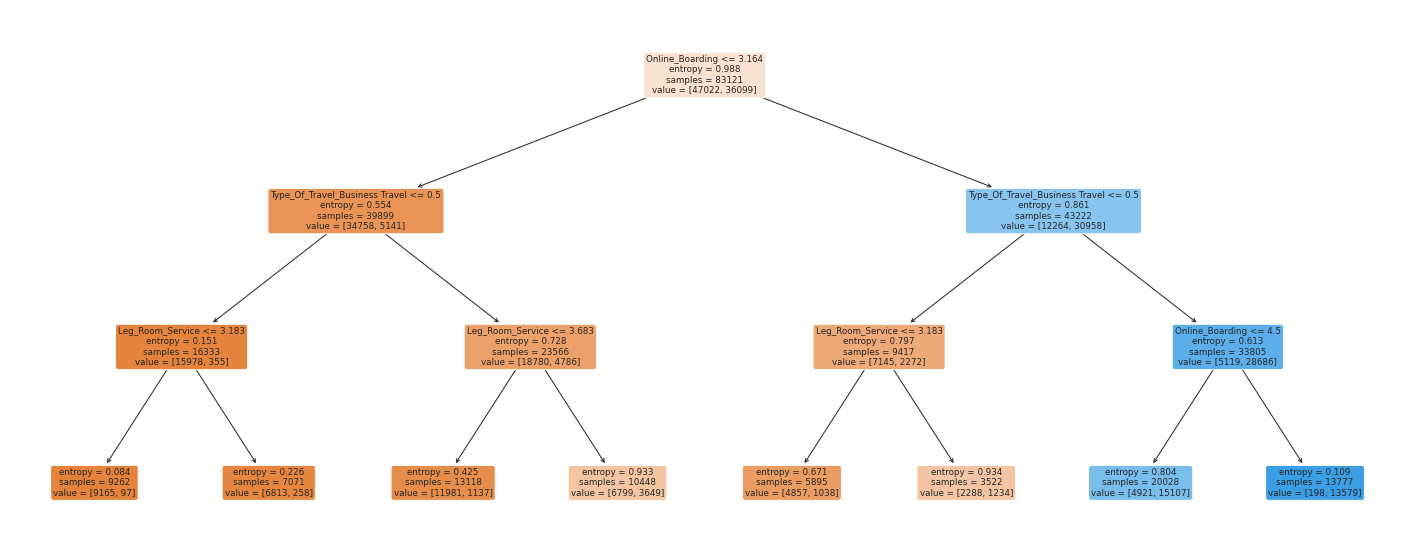

In [ ]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(decision_tree, 
                   feature_names=['Online_Boarding','Type_Of_Travel_Business Travel','Leg_Room_Service','Flight_Distance'],
                   filled=True,
                   rounded = True
                   )

**Accuracy**

In [ ]:
# Get probabilities of being a satisfied customer
prob = decision_tree.predict_proba(X_test)[:, 1]

print ( "Accuracy = %.6f" % (metrics.accuracy_score(decision_tree.predict(X), Y)) )

Accuracy = 0.849656


In [ ]:
pred = prob > 0.5

# Build and print a confusion matrix
confusion_matrix_large = pd.DataFrame(metrics.confusion_matrix(Y_test, pred, labels=[1, 0]).T,
                                columns=['p', 'n'], index=['Y', 'N'])
print (confusion_matrix_large)

      p      n
Y  7053   1218
N  1871  10639


**F1 Value**

In [ ]:
f1 = metrics.f1_score(Y_test, pred)
print(f1)

0.8203547542890375


**Decision Surface Online_Boarding and Type_Of_Travel_Business Travel**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


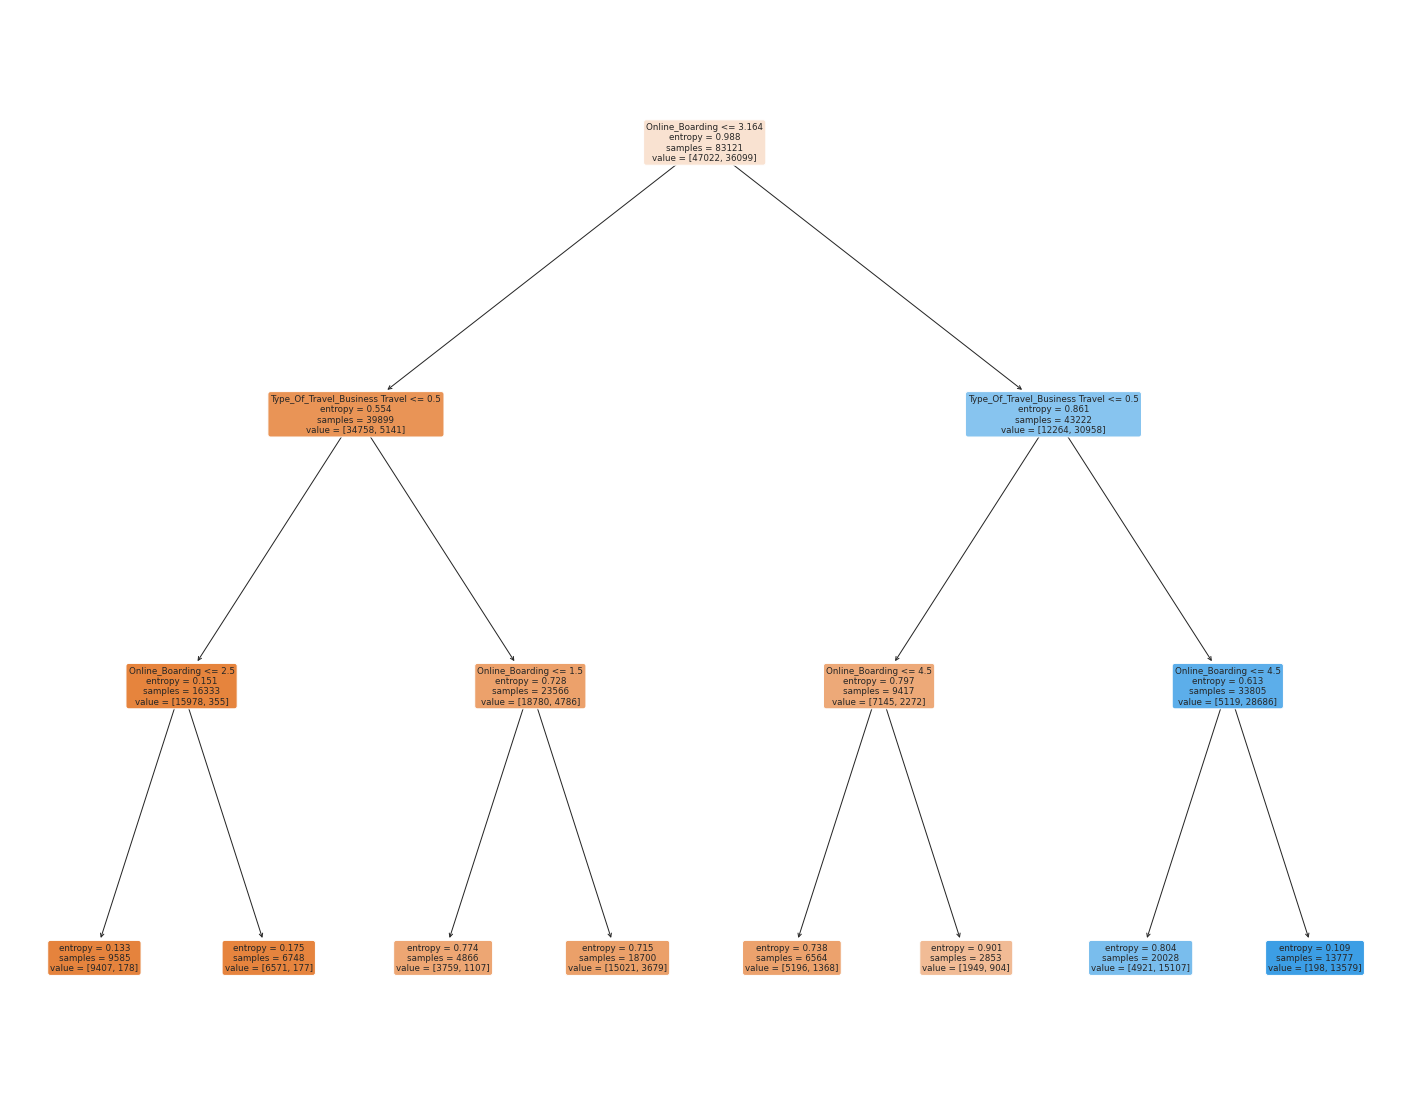

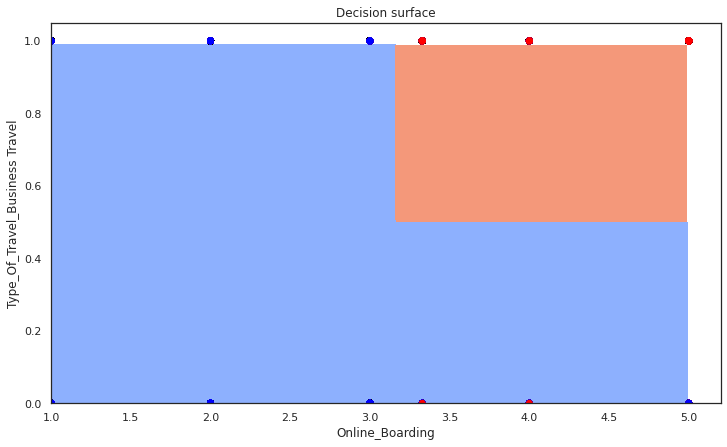

In [ ]:
#Option 4 - only two variable for decision surface
X = df_clean[['Online_Boarding','Type_Of_Travel_Business Travel']]
Y = df_clean['Satisfaction_satisfied']

# Set randomness so that we all get the same answer
np.random.seed(841)

# Split the data into train and test pieces for both X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


# Defining the model (tree)
decision_tree = DecisionTreeClassifier(max_depth = 3, criterion="entropy")   # Look at those 2 arguments !!! 

# Handing over the data to the model
decision_tree.fit(X_train, Y_train)

# Let's generate the tree
dot_data = tree.export_graphviz(decision_tree,
                                feature_names=['Online_Boarding', 'Type_Of_Travel_Business Travel'],
                                out_file=None,
                                filled=True,
                                rounded=True)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree, 
                   feature_names=['Online_Boarding','Type_Of_Travel_Business Travel'],
                   filled=True,
                   rounded = True
                   )


# define a function visualizing the decision surface
def Decision_Surface(data, target, model):
    # Get bounds
    x_min, x_max = data[data.columns[0]].min(), data[data.columns[0]].max()
    y_min, y_max = data[data.columns[1]].min(), data[data.columns[1]].max()
    
    # Create a mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max,0.01), np.arange(y_min, y_max,0.01))
    meshed_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
    
    plt.figure(figsize=[12,7])
    Z = model.predict(meshed_data).reshape(xx.shape)
            
    plt.title("Decision surface")    
    plt.ylabel("Type_Of_Travel_Business Travel")
    plt.xlabel("Online_Boarding")
    cs = plt.contourf(xx, yy, Z, levels=[-1,0,1],cmap=plt.cm.coolwarm,origin='lower')
    
    color1 = ["blue" if t==0 else "red" for t in target]
    
    plt.scatter(data[data.columns[0]], data[data.columns[1]], color=color1 )

# apply the function
Decision_Surface(X,Y,decision_tree)

# **Analysis of groups of similar customers**

# Installing the required packages

In [ ]:
!conda install -c conda-forge kneed

!pip install kneed

!git clone https://github.com/arvkevi/kneed.git
!python setup.py install

/bin/bash: conda: command not found
fatal: destination path 'kneed' already exists and is not an empty directory.
python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans


def kmeans_elbow_viz(data):
    sum_of_squared_distance = []
    n_cluster = range(1, 15)
    
    for k in n_cluster:
        kmean_model = KMeans(n_clusters=k)
        kmean_model.fit(data)

# Defining 'x' based on results from part 1

In [ ]:
X = df_clean[['Online_Boarding','Type_Of_Travel_Business Travel','Type_Of_Travel_Personal Travel','On_Board_Service','Leg_Room_Service','Flight_Distance']]

# Elbow method to determine number of Clusters

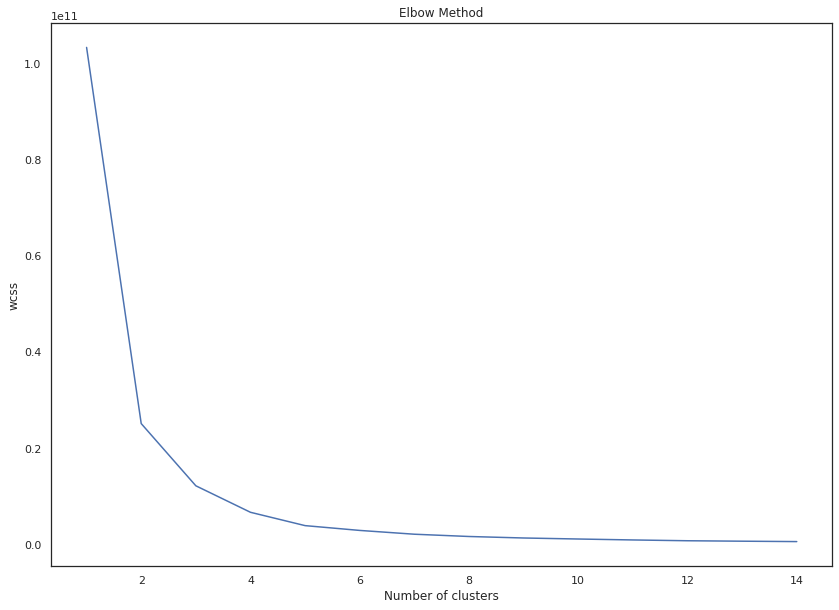

In [ ]:
#Using the elbow method to find the optimum number of clusters
wcss = []
for i in range(1,15):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,15),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
kl = KneeLocator(range(1, 15), wcss, curve="convex", direction="decreasing")

kl.elbow

3

# Clustering by using Kmeans

In [ ]:
# KMeans
X = df_clean[['Online_Boarding','Type_Of_Travel_Business Travel','Type_Of_Travel_Personal Travel','On_Board_Service','Leg_Room_Service','Flight_Distance']]

kmeans_model = KMeans(3)
kmeans_model.fit(X)

# Predict clusters
kmeans_clusters = kmeans_model.predict(X)

In [ ]:
kmeans_clusters1 = kmeans_model.fit_predict(X)

In [ ]:
print(kmeans_clusters1)

[0 0 2 ... 0 2 0]


In [ ]:
df_clean["labels"] = kmeans_clusters1

In [ ]:
df_clean[df_clean["labels"] == 0]

,Index,ID,Age,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_Of_Online_Booking,Gate_Location,Food_And_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_Min,Arrival_Delay_Min,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Of_Travel_Business Travel,Type_Of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Satisfaction_neutral_or_dissatisfied,Satisfaction_satisfied,labels
0,0,70172,13,460,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4,4.0,5.0,5.0,25,18.0,0,1,0,1,0,1,0,0,1,1,0,0
1,1,5047,25,235,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3,1.0,4.0,1.0,1,6.0,0,1,1,0,1,0,1,0,0,1,0,0
3,3,24026,25,562,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3,1.0,4.0,2.0,11,9.0,1,0,0,1,1,0,1,0,0,1,0,0
4,4,119299,61,214,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4,3.0,3.0,3.0,0,0.0,0,1,0,1,1,0,1,0,0,0,1,0
8,8,79485,41,853,1.0,2.0,2.0,2.0,4.0,3.0,3.0,1.0,1.0,2.0,1,4.0,1.0,2.0,0,0.0,1,0,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103918,103918,25309,36,432,1.0,5.0,1.0,3.0,4.0,1.0,4.0,4.0,5.0,2.0,5,2.0,3.0,4.0,0,0.0,1,0,1,0,1,0,0,1,0,1,0,0
103919,103919,78463,34,526,3.0,3.0,3.0,1.0,4.0,3.0,4.0,4.0,3.0,2.0,4,4.0,5.0,4.0,0,0.0,0,1,1,0,1,0,1,0,0,1,0,0
103920,103920,71167,23,646,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5,5.0,5.0,4.0,0,0.0,0,1,0,1,1,0,1,0,0,0,1,0
103921,103921,37675,17,828,2.0,5.0,1.0,5.0,2.0,1.0,2.0,2.0,4.0,3.0,4,5.0,4.0,2.0,0,0.0,1,0,0,1,0,1,0,1,0,1,0,0


In [ ]:
df_clean[df_clean["labels"] == 1]

,Index,ID,Age,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_Of_Online_Booking,Gate_Location,Food_And_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_Min,Arrival_Delay_Min,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Of_Travel_Business Travel,Type_Of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Satisfaction_neutral_or_dissatisfied,Satisfaction_satisfied,labels
18,18,70354,45,2486,4.0,4.0,4.0,4.0,3.0,4.0,5.0,5.0,5.0,5.0,5,3.0,5.0,4.0,7,5.0,1,0,0,1,1,0,1,0,0,0,1,1
28,28,118319,36,3347,3.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,3.0,3.0,3,2.0,3.0,2.0,18,12.0,1,0,0,1,1,0,1,0,0,1,0,1
32,32,70594,35,2611,4.0,5.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,5,4.0,3.0,4.0,109,120.0,1,0,0,1,1,0,1,0,0,0,1,1
43,43,28319,38,2882,3.0,3.0,3.0,3.0,2.0,1.0,4.0,5.0,5.0,5.0,5,2.0,5.0,4.0,0,0.0,1,0,0,1,1,0,1,0,0,0,1,1
55,55,7467,45,3334,2.0,4.0,2.0,2.0,4.0,5.0,5.0,4.0,4.0,4.0,4,3.0,4.0,5.0,51,48.0,1,0,0,1,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103878,103878,15176,37,2445,4.0,5.0,5.0,5.0,1.0,4.0,4.0,4.0,4.0,4.0,4,4.0,4.0,1.0,1,0.0,0,1,0,1,1,0,1,0,0,1,0,1
103886,103886,92323,36,2556,3.0,3.0,3.0,1.0,3.0,5.0,5.0,5.0,5.0,4.0,5,5.0,5.0,5.0,2,13.0,0,1,1,0,1,0,1,0,0,1,0,1
103889,103889,123802,43,3885,5.0,5.0,5.0,5.0,4.0,5.0,5.0,3.0,3.0,3.0,3,4.0,3.0,3.0,0,0.0,1,0,0,1,1,0,1,0,0,0,1,1
103904,103904,109108,29,2864,5.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,5.0,5.0,5,3.0,5.0,3.0,0,0.0,1,0,0,1,1,0,1,0,0,0,1,1


In [ ]:
df_clean[df_clean["labels"] == 2]

,Index,ID,Age,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_Of_Online_Booking,Gate_Location,Food_And_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_Min,Arrival_Delay_Min,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Of_Travel_Business Travel,Type_Of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Satisfaction_neutral_or_dissatisfied,Satisfaction_satisfied,labels
2,2,110028,26,1142,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4,4.0,4.0,5.0,0,0.0,1,0,0,1,1,0,1,0,0,0,1,2
5,5,111157,26,1180,3.0,4.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,4.0,4,4.0,4.0,1.0,0,0.0,1,0,0,1,0,1,0,1,0,1,0,2
6,6,82113,47,1276,2.0,4.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,3.0,4,3.0,5.0,2.0,9,23.0,0,1,0,1,0,1,0,1,0,1,0,2
7,7,96462,52,2035,4.0,3.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5,4.0,5.0,4.0,4,0.0,1,0,0,1,1,0,1,0,0,0,1,2
10,10,34991,24,1182,4.0,5.0,5.0,4.0,2.0,5.0,2.0,2.0,3.0,3.0,5,3.0,5.0,2.0,0,0.0,1,0,1,0,1,0,0,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103901,103901,68825,30,1995,1.0,1.0,1.0,3.0,4.0,1.0,5.0,4.0,3.0,2.0,4,5.0,5.0,4.0,7,14.0,0,1,1,0,1,0,1,0,0,1,0,2
103903,103903,62567,27,1723,1.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,4,4.0,3.0,1.0,0,0.0,0,1,0,1,1,0,1,0,0,1,0,2
103907,103907,74541,58,1171,2.0,4.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0,2,2.0,2.0,1.0,0,18.0,1,0,0,1,1,0,0,1,0,1,0,2
103909,103909,126836,51,2296,3.0,3.0,3.0,3.0,5.0,5.0,4.0,5.0,5.0,5.0,5,3.0,5.0,3.0,2,0.0,0,1,0,1,1,0,1,0,0,0,1,2


In [ ]:
df_clean[df_clean["labels"] == 0].mean()

Index                                   51886.411534
ID                                      61439.507979
Age                                        38.320897
Flight_Distance                           539.008373
Inflight_Wifi_Service                       2.805075
Departure_Arrival_Time_Convenient           3.290970
Ease_Of_Online_Booking                      2.834251
Gate_Location                               2.975808
Food_And_Drink                              3.152340
Online_Boarding                             3.159663
Seat_Comfort                                3.291583
Inflight_Entertainment                      3.239997
On_Board_Service                            3.278250
Leg_Room_Service                            3.247106
Baggage_Handling                            3.581870
Checkin_Service                             3.233726
Inflight_Service                            3.587225
Cleanliness                                 3.199898
Departure_Delay_Min                        14.

In [ ]:
df_clean[df_clean["labels"] == 1].mean()

Index                                   51920.958979
ID                                      66215.112806
Age                                        42.739557
Flight_Distance                          3091.361993
Inflight_Wifi_Service                       2.844265
Departure_Arrival_Time_Convenient           3.035063
Ease_Of_Online_Booking                      3.006436
Gate_Location                               2.996061
Food_And_Drink                              3.352124
Online_Boarding                             3.794635
Seat_Comfort                                3.816221
Inflight_Entertainment                      3.684262
On_Board_Service                            3.627150
Leg_Room_Service                            3.679735
Baggage_Handling                            3.765133
Checkin_Service                             3.450413
Inflight_Service                            3.729217
Cleanliness                                 3.511148
Departure_Delay_Min                        14.

In [ ]:
df_clean[df_clean["labels"] == 2].mean()

Index                                   52190.962078
ID                                      73771.746624
Age                                        40.018508
Flight_Distance                          1693.593727
Inflight_Wifi_Service                       2.816693
Departure_Arrival_Time_Convenient           3.171064
Ease_Of_Online_Booking                      2.926692
Gate_Location                               2.966650
Food_And_Drink                              3.252671
Online_Boarding                             3.476846
Seat_Comfort                                3.592303
Inflight_Entertainment                      3.464950
On_Board_Service                            3.504870
Leg_Room_Service                            3.482742
Baggage_Handling                            3.679710
Checkin_Service                             3.400535
Inflight_Service                            3.728618
Cleanliness                                 3.373941
Departure_Delay_Min                        14.

In [ ]:
df_clean[df_clean["labels"] == 0].describe()

,Index,ID,Age,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_Of_Online_Booking,Gate_Location,Food_And_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_Min,Arrival_Delay_Min,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Of_Travel_Business Travel,Type_Of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Satisfaction_neutral_or_dissatisfied,Satisfaction_satisfied,labels
count,64731.000000,64731.000000,64731.000000,64731.000000,64731.000000,64731.000000,64731.000000,64731.000000,64731.000000,64731.000000,64731.000000,64731.000000,64731.000000,64731.000000,64731.000000,64731.000000,64731.000000,64731.000000,64731.000000,64543.000000,64731.000000,64731.000000,64731.000000,64731.000000,64731.000000,64731.000000,64731.000000,64731.000000,64731.000000,64731.000000,64731.000000,64731.0
mean,51886.411534,61439.507979,38.320897,539.008373,2.805075,3.290970,2.834251,2.975808,3.152340,3.159663,3.291583,3.239997,3.278250,3.247106,3.581870,3.233726,3.587225,3.199898,14.907587,15.439227,0.510157,0.489843,0.244520,0.755480,0.604795,0.395205,0.311875,0.593302,0.094823,0.670791,0.329209,0.0
std,29968.995580,38507.263848,15.714044,280.464686,1.212897,1.324553,1.234265,1.240680,1.346758,1.251721,1.351100,1.354686,1.302741,1.311956,1.195458,1.284129,1.185303,1.337426,37.292220,37.975960,0.499901,0.499901,0.429805,0.429805,0.488898,0.488898,0.463263,0.491221,0.292973,0.469929,0.469929,0.0
min,0.000000,1.000000,7.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,25942.500000,26334.000000,25.000000,306.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,51676.000000,56777.000000,38.000000,501.000000,3.000000,3.224833,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0
75%,77850.500000,96280.500000,50.000000,762.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,13.000000,13.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0
max,103923.000000,129880.000000,85.000000,1116.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [ ]:
df_clean[df_clean["labels"] == 1].describe()

,Index,ID,Age,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_Of_Online_Booking,Gate_Location,Food_And_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_Min,Arrival_Delay_Min,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Of_Travel_Business Travel,Type_Of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Satisfaction_neutral_or_dissatisfied,Satisfaction_satisfied,labels
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15938.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000,15992.0
mean,51920.958979,66215.112806,42.739557,3091.361993,2.844265,3.035063,3.006436,2.996061,3.352124,3.794635,3.816221,3.684262,3.627150,3.679735,3.765133,3.450413,3.729217,3.511148,14.570785,14.937822,0.502439,0.497561,0.020135,0.979865,0.933904,0.066096,0.914020,0.071973,0.014007,0.284955,0.715045,1.0
std,30138.535798,37474.122013,12.684381,503.272546,1.302976,1.390264,1.350797,1.375131,1.263867,1.151659,1.145444,1.207987,1.230062,1.202283,1.150917,1.221989,1.166828,1.220021,40.202500,40.331648,0.500010,0.500010,0.140467,0.140467,0.248457,0.248457,0.280344,0.258452,0.117523,0.451407,0.451407,0.0
min,18.000000,5.000000,7.000000,2392.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,25618.500000,33927.250000,34.000000,2609.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,52173.500000,66643.500000,44.000000,3037.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.0
75%,77910.250000,97655.750000,52.000000,3530.250000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,11.000000,12.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.0
max,103906.000000,129865.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [ ]:
df_clean[df_clean["labels"] == 2].describe()

,Index,ID,Age,Flight_Distance,Inflight_Wifi_Service,Departure_Arrival_Time_Convenient,Ease_Of_Online_Booking,Gate_Location,Food_And_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,On_Board_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_Min,Arrival_Delay_Min,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Of_Travel_Business Travel,Type_Of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Satisfaction_neutral_or_dissatisfied,Satisfaction_satisfied,labels
count,23179.000000,23179.000000,23179.000000,23179.000000,23179.000000,23179.000000,23179.000000,23179.000000,23179.000000,23179.000000,23179.000000,23179.00000,23179.000000,23179.000000,23179.000000,23179.000000,23179.000000,23179.000000,23179.000000,23111.000000,23179.0000,23179.0000,23179.000000,23179.000000,23179.000000,23179.000000,23179.000000,23179.000000,23179.000000,23179.000000,23179.000000,23179.0
mean,52190.962078,73771.746624,40.018508,1693.593727,2.816693,3.171064,2.926692,2.966650,3.252671,3.476846,3.592303,3.46495,3.504870,3.482742,3.679710,3.400535,3.728618,3.373941,14.715993,14.606421,0.5033,0.4967,0.122223,0.877777,0.758100,0.241900,0.641098,0.310151,0.048751,0.470296,0.529704,2.0
std,29992.077407,32684.491647,14.565587,362.061283,1.262819,1.377269,1.304958,1.308937,1.297374,1.219985,1.269855,1.30475,1.252833,1.266439,1.151074,1.226337,1.144587,1.275732,39.395195,39.522218,0.5000,0.5000,0.327550,0.327550,0.428243,0.428243,0.479689,0.462565,0.215352,0.499128,0.499128,0.0
min,2.000000,4.000000,7.000000,1117.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,26248.000000,53717.500000,29.000000,1411.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.00000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.0000,0.0000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,52566.000000,74048.000000,41.000000,1665.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,0.000000,1.0000,0.0000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.0
75%,78259.000000,100038.000000,51.000000,1979.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.00000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.0000,1.0000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.0
max,103922.000000,129855.000000,85.000000,2391.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.0000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0


In [ ]:
#@title
# DBSCAN
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples = 15)
dbscan_clusters = dbscan_model.fit_predict(X)

In [ ]:
from sklearn.metrics import davies_bouldin_score
labels = kmeans_model.labels_
davies_bouldin_score(X, labels)

0.514121313957089

In [ ]:
labels = dbscan_model.labels_
davies_bouldin_score(X, labels)

1.5032058062600107